# Problem Statement :

- The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.
  
- The company can utilise this knowledge for its portfolio and risk assessment. 

**The Overall EDA is performed in 3 Sections.**(Each Section Header provides the sequence for Analysis along with the its Outcome and Observations)
  - **Section 1**
  - **Section 2**
  - **Section 3**  

**Section 1 : Read DataFrame and perform the Data Understanding and Cleaning Activity**  
   -  Drop Columns which do not have any values across all Rows.  
   -  Drop Columns which have more than 50% of the Rows with empty values.  
   -  Change values of columns like loan status to business standard like "Default" and "Non-Default"
   -  Drop Rows which have loan_status column values as "Current" since that is not considered for Analysis 
   -  Drop Rows which have all column values as NA or Null
   -  Drop Rows which are duplicate

**Outcome of Section**  
   - The initial Data Frame of shape (39717, 111) was reduced to (38577, 54) with business terminologies(loan_status) "Default" and "Non-Default"
   - Identified set of columns(features) that would be used for further analysis
       -  'loan_amnt' : The Loan Amount
       -  'int_rate' : Interest Rate on the loan
       -  'annual_inc' : The self-reported annual income provided by the borrower during registration.
       -  'revol_util' : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
       - 'dti': A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
       - 'loan_status'   :  Current status of the loan listing 'Default' , 'Non-Default' and 'Current'
       - 'term'          : The number of payments on the loan. Values are in months and can be either 36 or 60.  
       - 'grade'         : LC assigned loan grade  
       - 'sub_grade'     : LC assigned loan subgrade  
       - 'emp_length'    : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more                             years.  
       - 'home_ownership': The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
       - 'verification_status': Indicates if income was verified by LC, not verified, or if the income source was verified  
       - 'purpose'       : A category provided by the borrower for the loan request.
       - 'addr_state'    : The state provided by the borrower in the loan application  
       - 'pub_rec'       : Number of derogatory public records
       - 'pub_rec_bankruptcies': Number of public record bankruptcies
       - 'loan_status'   :  Current status of the loan listing 'Default' , 'Non-Default' and 'Current'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
df = pd.read_csv("loan.csv",low_memory=False)
warnings.filterwarnings('ignore')
df.shape

(39717, 111)

In [5]:
# Dropping the columns which have all its values as "NA"
df.dropna(axis = 1, how = 'all', inplace = True)
df.shape

(39717, 57)

In [6]:
# Dropping the columns which have more that 50% of its values as NA"
df = df.loc[:, df.isnull().mean() < 0.5]

# Dropping the Rows if all columns have NA , duplicate Rows"
df = df.dropna(how='all')
df.drop_duplicates(inplace=True)
df = df.dropna(subset=['int_rate', 'annual_inc'])

# DataType Changes for int_rate,revol_util and applyig Business Terminology for loan_status
df['int_rate'] = df['int_rate'].str.replace('%', '').astype(float)
df['revol_util'] = df['revol_util'].str.replace('%', '').astype(float)
df = df[df['loan_status'] != 'Current']
df.loc[df['loan_status'] == 'Charged Off', 'loan_status'] = 'Default'
df.loc[df['loan_status'] == 'Fully Paid', 'loan_status'] = 'Non-Default'
print(df.shape)
df.head()

(38577, 54)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
# Print the count of unique values in each column so that valid set of columns would be considered for further analysis based on domain knowledge 
print(df.nunique())

id                            38577
member_id                     38577
loan_amnt                       870
funded_amnt                    1019
funded_amnt_inv                8050
term                              2
int_rate                        370
installment                   15022
grade                             7
sub_grade                        35
emp_title                     28027
emp_length                       11
home_ownership                    5
annual_inc                     5215
verification_status               3
issue_d                          55
loan_status                       2
pymnt_plan                        1
url                           38577
desc                          25802
purpose                          14
title                         19297
zip_code                        822
addr_state                       50
dti                            2853
delinq_2yrs                      11
earliest_cr_line                524
inq_last_6mths              

**Section 2 : Perform Analysis on the Numeric Data to see their relationship with Loan Status**  
   - Check for Outliers and Remove them  
   - Check for Correlation between the numeric fields and Loan Status
   - Columns considered 'delinq_2yrs','inq_last_6mths','loan_amnt','int_rate', 'annual_inc','dti'
       -  'delinq_2yrs' : The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
       -  'inq_last_6mths' : The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
       -  'loan_amnt' : The Loan Amount
       -  'int_rate' : Interest Rate on the loan
       -  'annual_inc' : The self-reported annual income provided by the borrower during registration.
       - 'dti': A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
       - 'loan_status'   :  Current status of the loan listing 'Default' , 'Non-Default' and 'Current'
         

**Observations of this section**  
   - Outliers were identified for annual_inc and removed using IQR since annual_inc did not have a normal distribution 
   - For the Correlation analysis perfomed using heatmap and distribution via Box pLot  
       - **int_rate** indicates that Loans with higher int_rate have more risk of getting Defaulted
       - **dti** Debt to Income Ratio indicates that higher dti ratio are at higher risk of getting Defaulted
       - **annual_inc** even though the correlation is not very prominent but still lower annual inc have higher risk of getting Defaulted  
       - **loan_amt** even though the correlation is not very prominent but still higher loan_amt have higher risk of getting Defaulted  
        
           

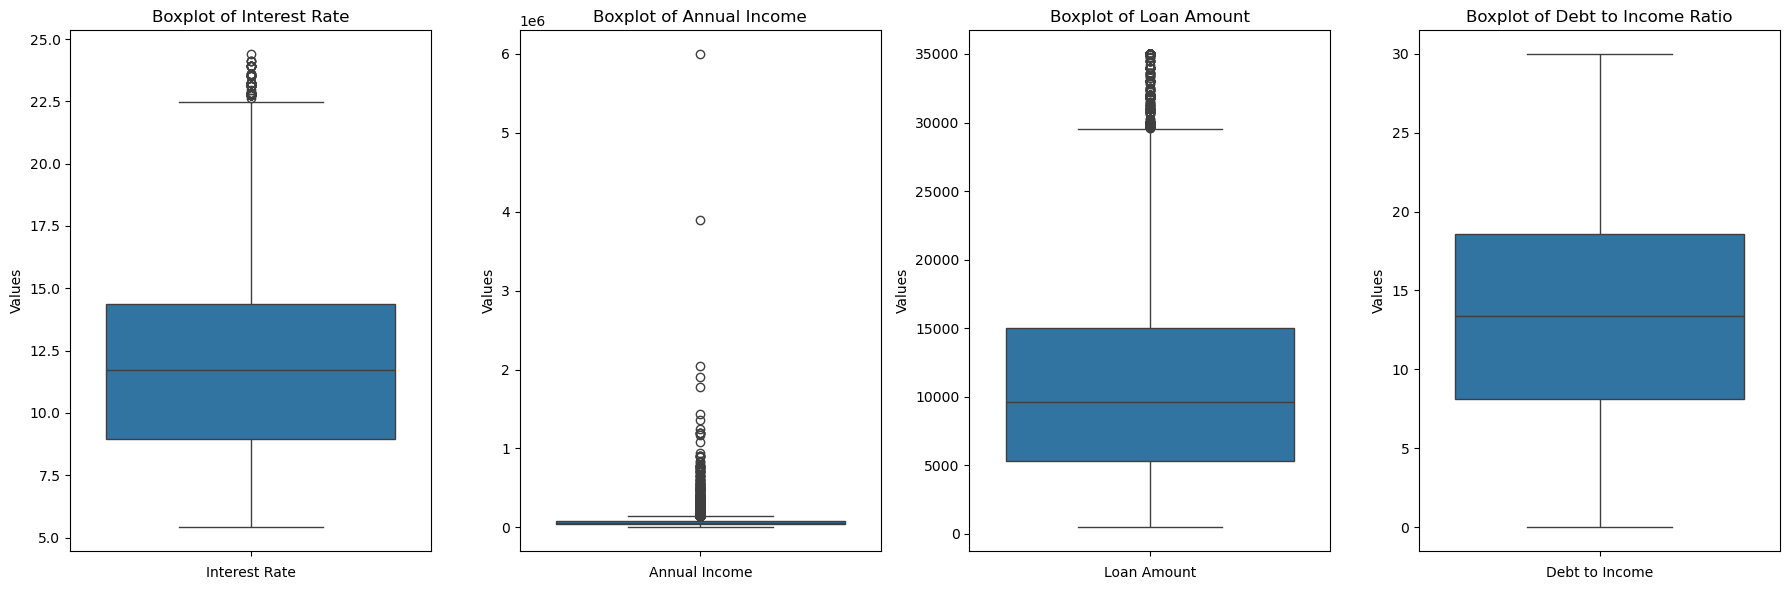

In [9]:
# Box Plot to identity Outliers in int_rate,annual_inc,loan_amnt
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Boxplot for int_rate
sns.boxplot(df['int_rate'], ax=axes[0])
axes[0].set_title("Boxplot of Interest Rate")
axes[0].set_xlabel("Interest Rate")
axes[0].set_ylabel("Values")

# Boxplot for annual_inc
sns.boxplot(df['annual_inc'], ax=axes[1])
axes[1].set_title("Boxplot of Annual Income")
axes[1].set_xlabel("Annual Income")
axes[1].set_ylabel("Values")

# Boxplot for loan_amnt
sns.boxplot(df['loan_amnt'], ax=axes[2])
axes[2].set_title("Boxplot of Loan Amount")
axes[2].set_xlabel("Loan Amount")
axes[2].set_ylabel("Values")

sns.boxplot(df['dti'], ax=axes[3])
axes[3].set_title("Boxplot of Debt to Income Ratio")
axes[3].set_xlabel("Debt to Income")
axes[3].set_ylabel("Values")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

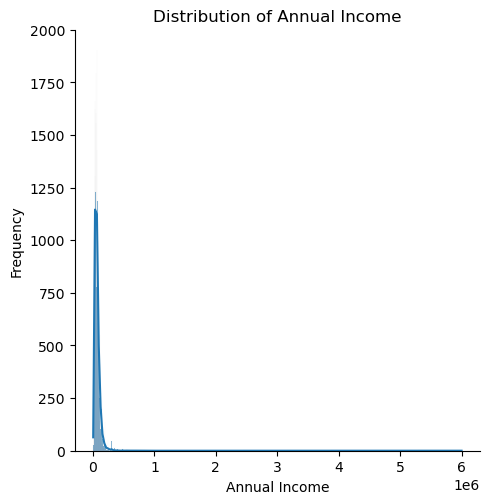

In [10]:
# Since the annual_inc had outliers we need to identify the distribution in orer to  choose the most appropriate logic for removing identifiers  
sns.displot(df['annual_inc'], kde=True) 
# Set the title and labels
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
# Show the plot
plt.show()

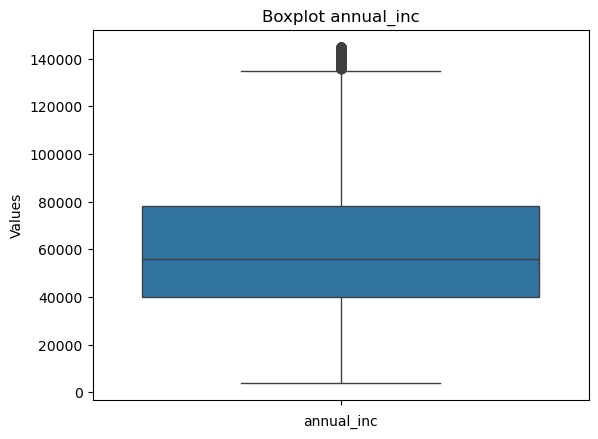

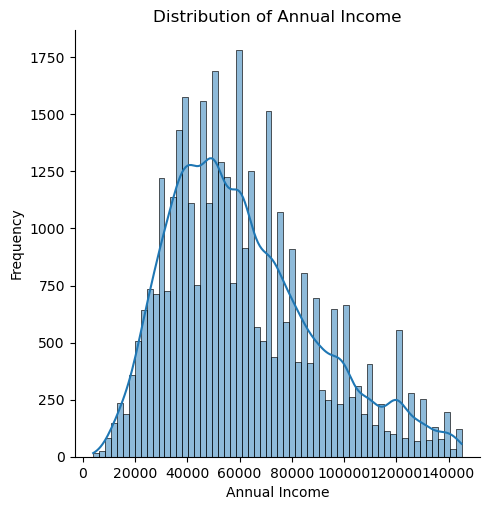

In [11]:
# Since the distribution curve is not normal we would be proceeding with IQR to remove outliers    
Q1 = df['annual_inc'].quantile(0.25)
Q3 = df['annual_inc'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove rows with outliers in 'annual_inc'
df = df[(df['annual_inc'] >= lower_bound) & (df['annual_inc'] <= upper_bound)]
df.shape
sns.boxplot(df['annual_inc'])

# Box PLot after removing Outliers
plt.title("Boxplot annual_inc")
plt.xlabel("annual_inc")
plt.ylabel("Values")

# Distribution plot after removing outliers
sns.displot(df['annual_inc'], kde=True) 
# Set the title and labels
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
# Show the plot
plt.show()

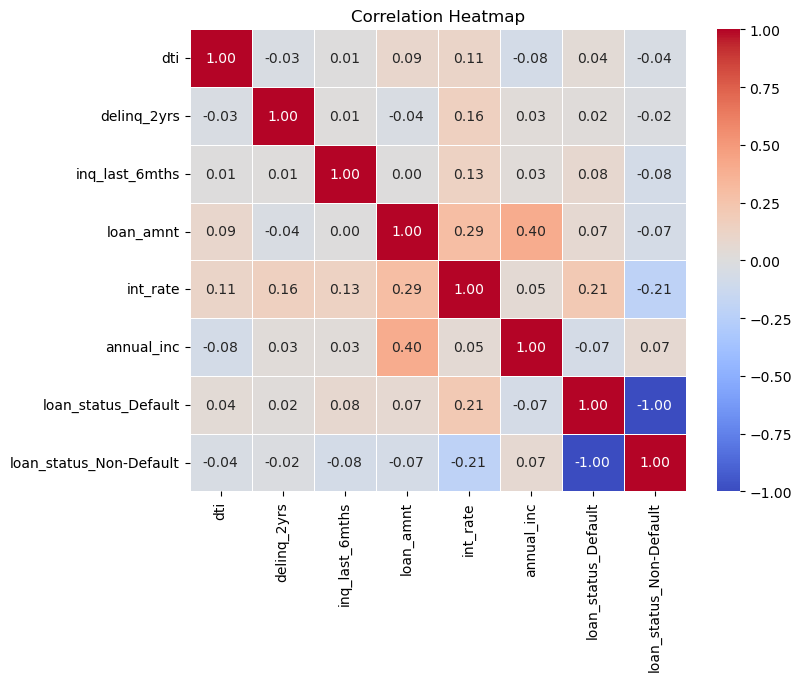

In [12]:
# Now Since Ouliers have been removed we try to analyze correlation factor

df_encoded = pd.get_dummies(df, columns=['loan_status'], drop_first=False)
# Calculate the correlation matrix
corr_matrix = df_encoded[['dti','delinq_2yrs','inq_last_6mths','loan_amnt','int_rate', 'annual_inc', 'loan_status_Default', 'loan_status_Non-Default']].corr()
# Display the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

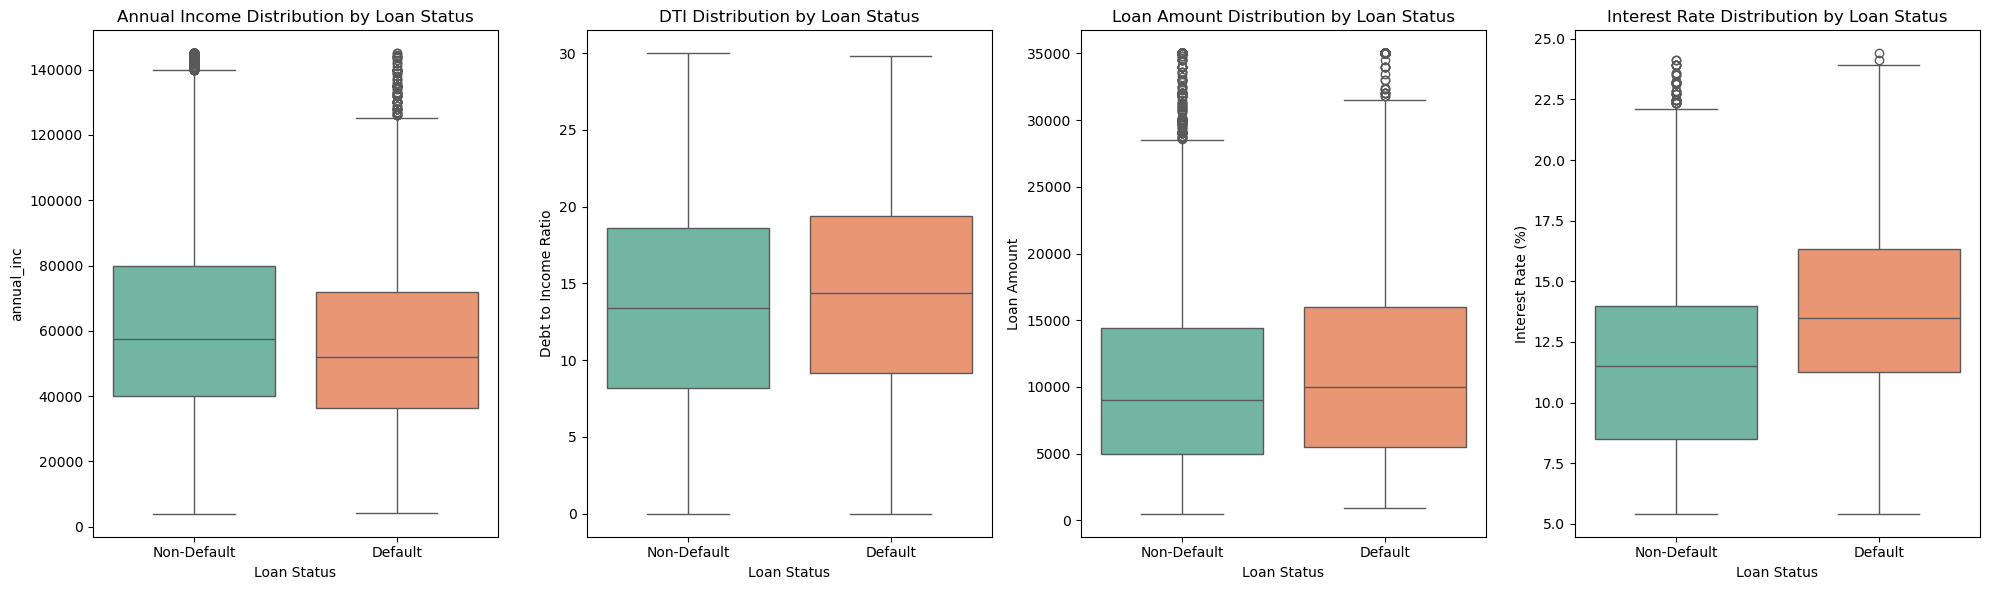

In [13]:
# Analyze The Distribution of annual_inc,loan_amt,int_rate across different loan status (Non-Default, Deafult and Current) 

fig, axes = plt.subplots(1, 4, figsize=(20, 6))

# First Boxplot: annual_inc by loan_status
sns.boxplot(x='loan_status', y='annual_inc', data=df, palette="Set2", ax=axes[0])
axes[0].set_title('Annual Income Distribution by Loan Status')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('annual_inc')

# First Boxplot: dti (DEbt to income ratio) by loan_status
sns.boxplot(x='loan_status', y='dti', data=df, palette="Set2", ax=axes[1])
axes[1].set_title('DTI Distribution by Loan Status')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Debt to Income Ratio')

# Second Boxplot: loannual_incamnt by loan_status
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette="Set2", ax=axes[2])
axes[2].set_title('Loan Amount Distribution by Loan Status')
axes[2].set_xlabel('Loan Status')
axes[2].set_ylabel('Loan Amount')

# Third Boxplot: int_rate by loan_status
sns.boxplot(x='loan_status', y='int_rate', data=df, palette="Set2", ax=axes[3])
axes[3].set_title('Interest Rate Distribution by Loan Status')
axes[3].set_xlabel('Loan Status')
axes[3].set_ylabel('Interest Rate (%)')


# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

**Section3 - Perform Analysis on the Categorical Variables to see their relationship with Loan Status**  
  - Check for Relationship between Categorical Varaibles and Loan Status
    
  - Columns considered 'term','grade','emp_length','home_ownership', 'verification_status', 'purpose','addr_state','pub_rec','pub_rec_bankruptcies'  
       - 'term'          : The number of payments on the loan. Values are in months and can be either 36 or 60.  
       - 'grade'         : LC assigned loan grade  
       - 'sub_grade'     : LC assigned loan subgrade
       - 'revol_util'    : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
       - 'emp_length'    : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more                             years.  
       - 'home_ownership': The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
       - 'verification_status': Indicates if income was verified by LC, not verified, or if the income source was verified  
       - 'purpose'       : A category provided by the borrower for the loan request.
       - 'addr_state'    : The state provided by the borrower in the loan application  
       - 'pub_rec'       : Number of derogatory public records
       - 'pub_rec_bankruptcies': Number of public record bankruptcies
       - 'loan_status'   :  Current status of the loan listing 'Default' , 'Non-Default' and 'Current'
   
 
**Observations of this Section**
  - The following Categorical Variables have a considerable or prominent impact on Loan getting Defaulted  
      - **term** , Higher Term like 60 months are at a higher risk of getting defaulted  
      - **grade** and **sub_grade** , lower the grade then higher is the risk of getting defaulted
      - **revol_util** , higher the Revolving line utilization rate then higher is the risk of loan getting defaulted.    
      - **purpose** , the purpose named small_business has an higher probability of getting defaulted  
      - **addr_state** ,  the state 'NE' has a higher probability of getting defaulted though the count of samples considered are very less  
      - **pub_rec_bankruptcies**, higher the number of publicly recorded bankruptcies relates to higher risk of getting Defaulted
        <br><br>               
  - The following Categorical Variables do not have a significant or prominent impact on Loan getting Deafulted
      - **emp_length**  
      - **home_ownership**  
      - **verification_status**  
      - **pub_rec**  


In [15]:
# Create a Reusable Method that would plot bar chart to analyze the loan status distribution in terms of percentage for a particular categorical variable

def plot_loan_status_percentage(df, column1, column2): 
    """
    This function takes in a dataframe and two columns to analyze the loan status distribution.
    It groups the data by the two columns, normalizes the loan status percentages, 
    and then plots a stacked bar chart.

    :param df: DataFrame containing the data
    :param column1: The first column to group by (e.g., 'purpose')
    :param column2: The second column to group by (e.g., 'loan_status')
    """
    # Group the data by the two columns and get the count of loan status
    loan_status_percentage = df.groupby([column1, column2]).size().unstack(fill_value=0)
    total_count_column1 = df.groupby(column1).size()   

    
    # Normalize the data to get percentages
    loan_status_percentage = loan_status_percentage.div(loan_status_percentage.sum(axis=1), axis=0) * 100

    # Plotting the stacked bar chart
    ax = loan_status_percentage.plot(kind='bar', stacked=True, figsize=(15, 6), color=['salmon', 'lightgreen'])

    # Add title and labels
    plt.title(f'Percentage Distribution of Loan Status by {column1} and {column2}')
    plt.xlabel(column1)
    plt.ylabel('Percentage (%)')

    # Add a legend
    plt.legend(title='Loan Status')

     # Annotate the bars with percentage values
    if column1 != 'addr_state' and column1 != 'sub_grade':
     for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x_position = p.get_x() + width / 2
        y_position = p.get_y() + height / 2
        percentage = f'{height:.1f}%'  # Format the percentage value
        ax.annotate(percentage, (x_position, y_position), color='black', ha='center', va='center')


    # Show the plot
    plt.show()

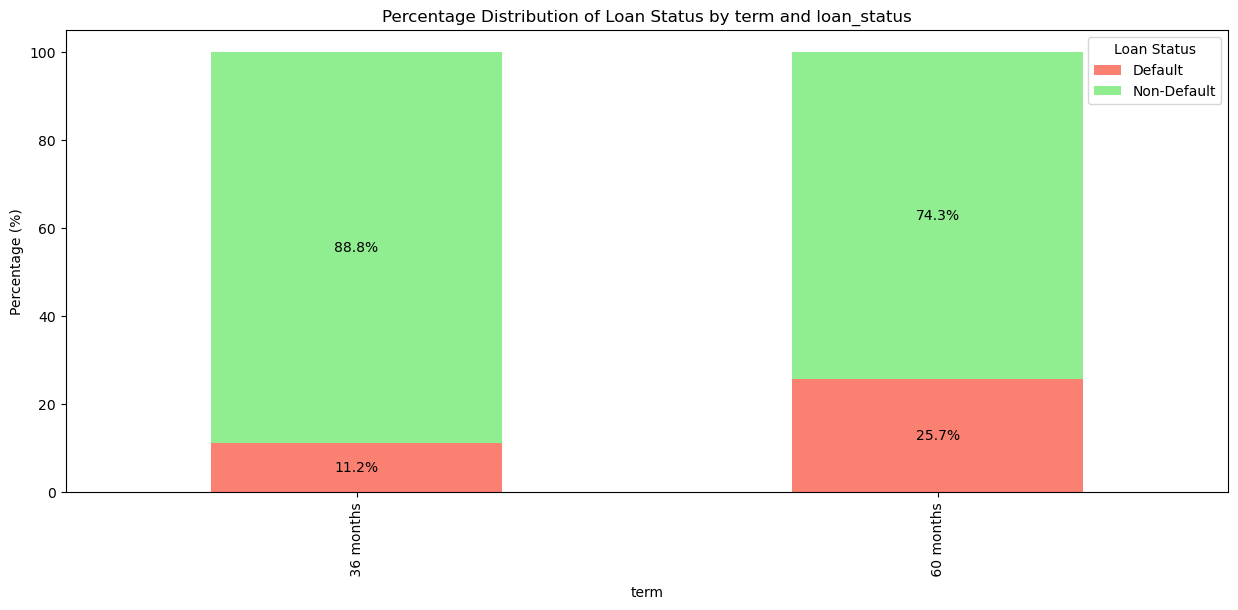

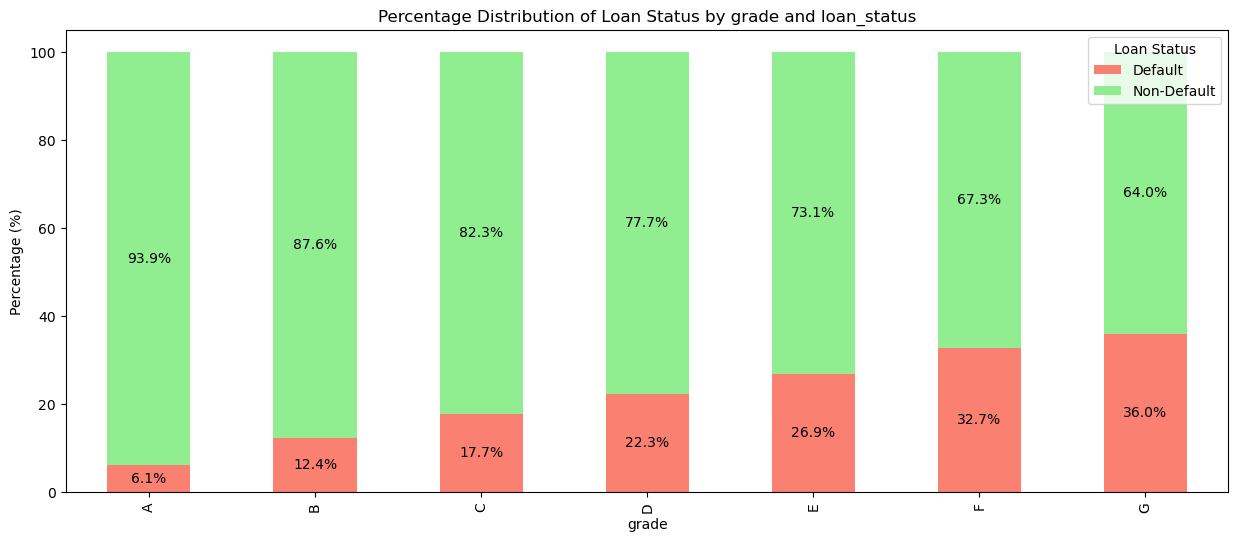

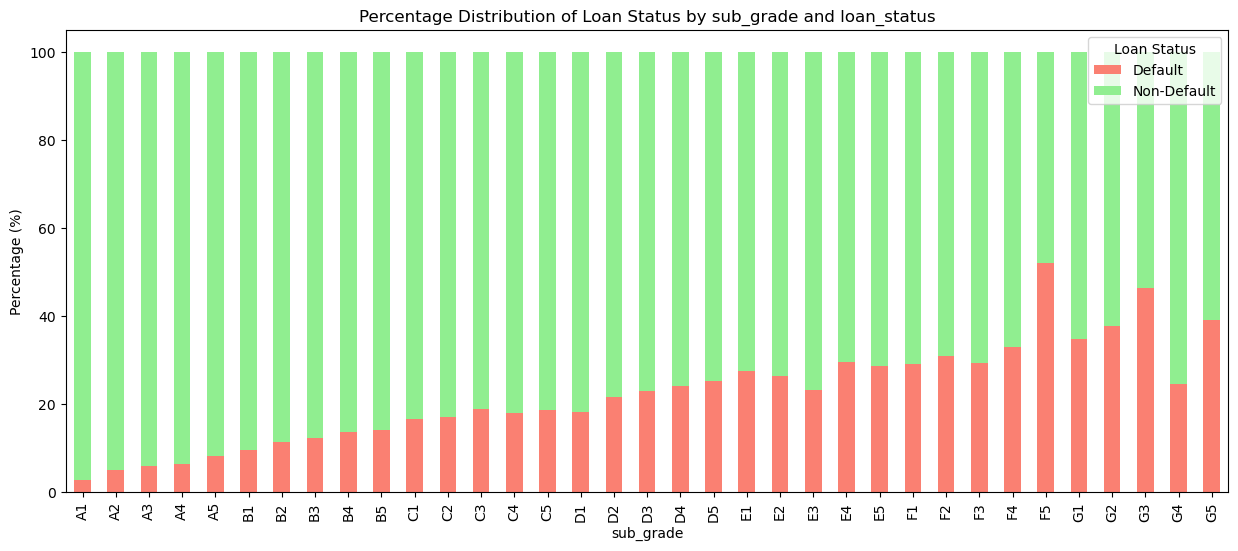

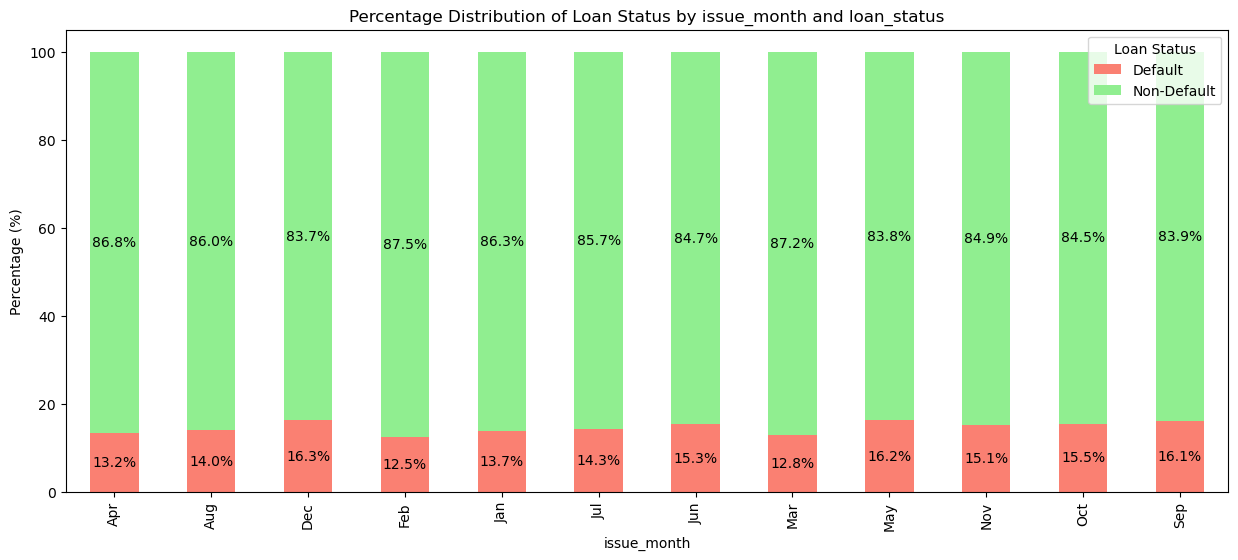

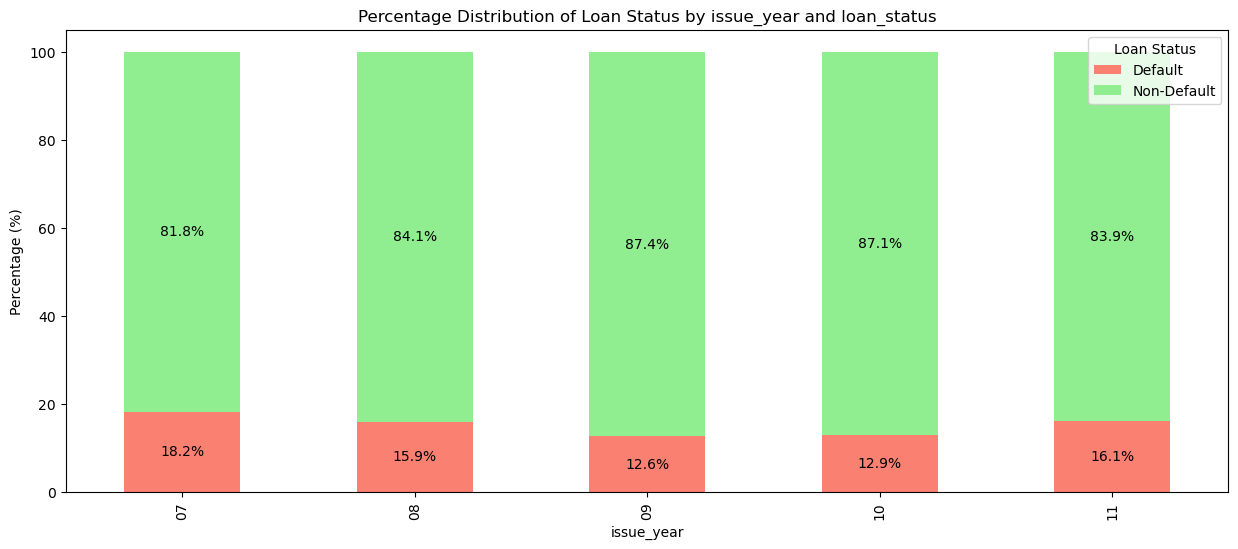

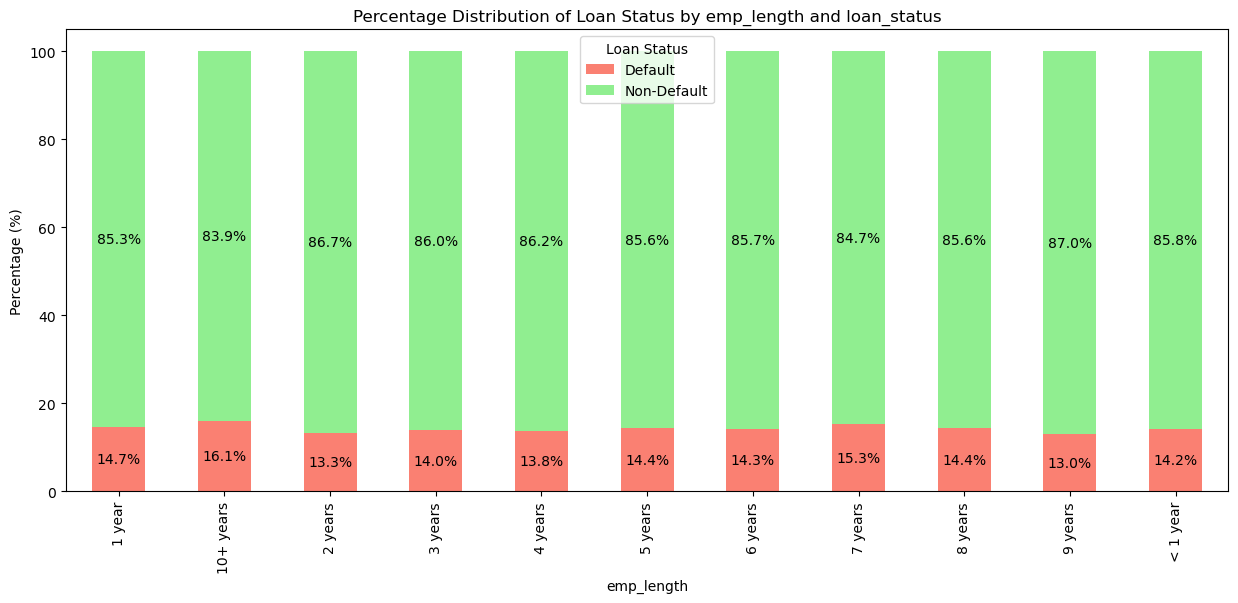

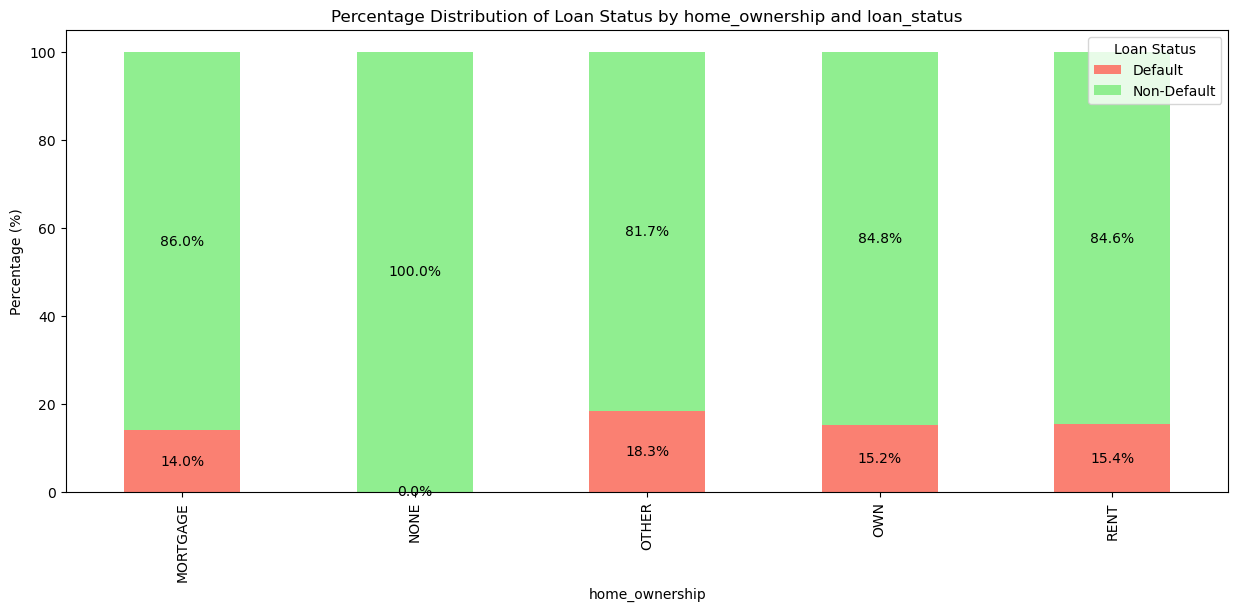

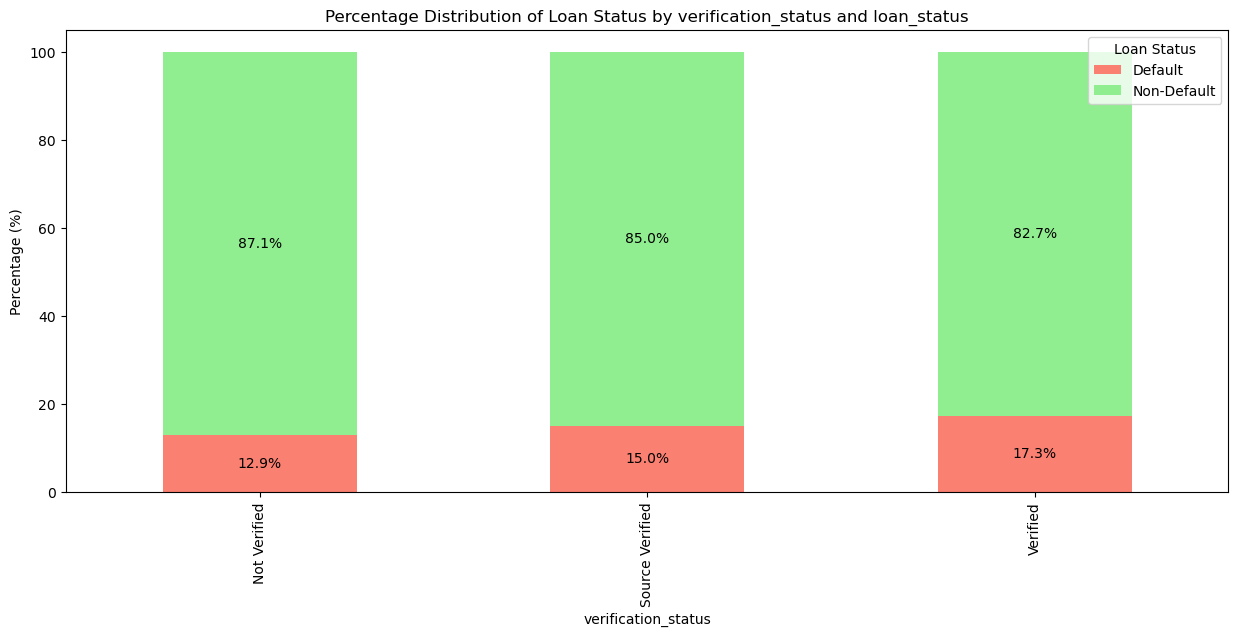

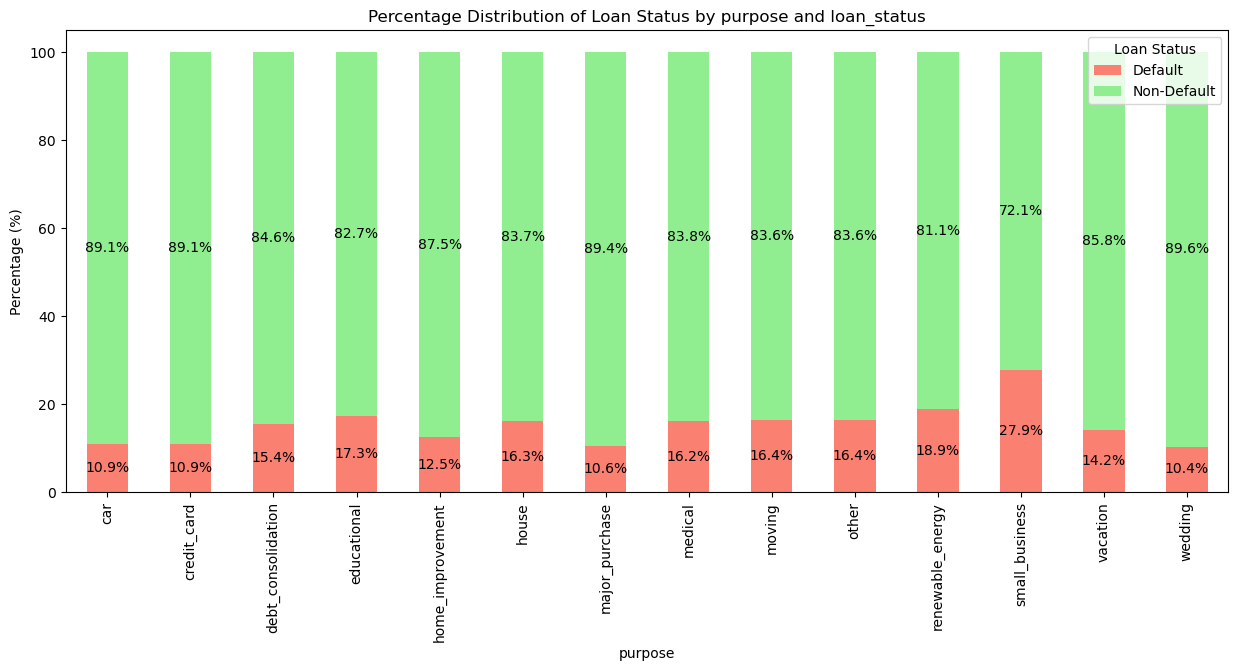

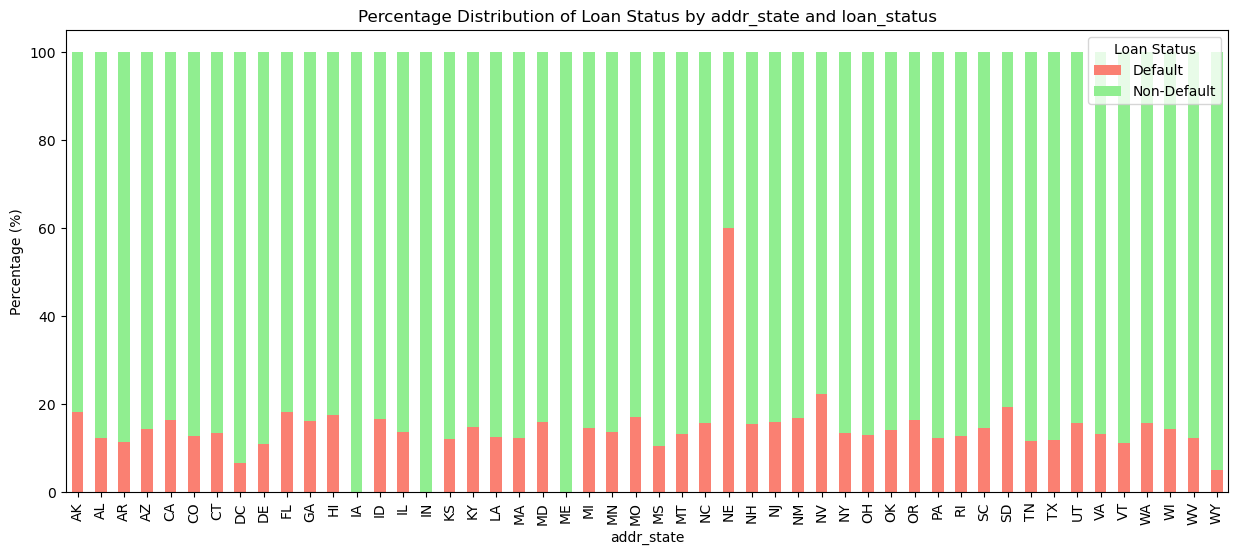

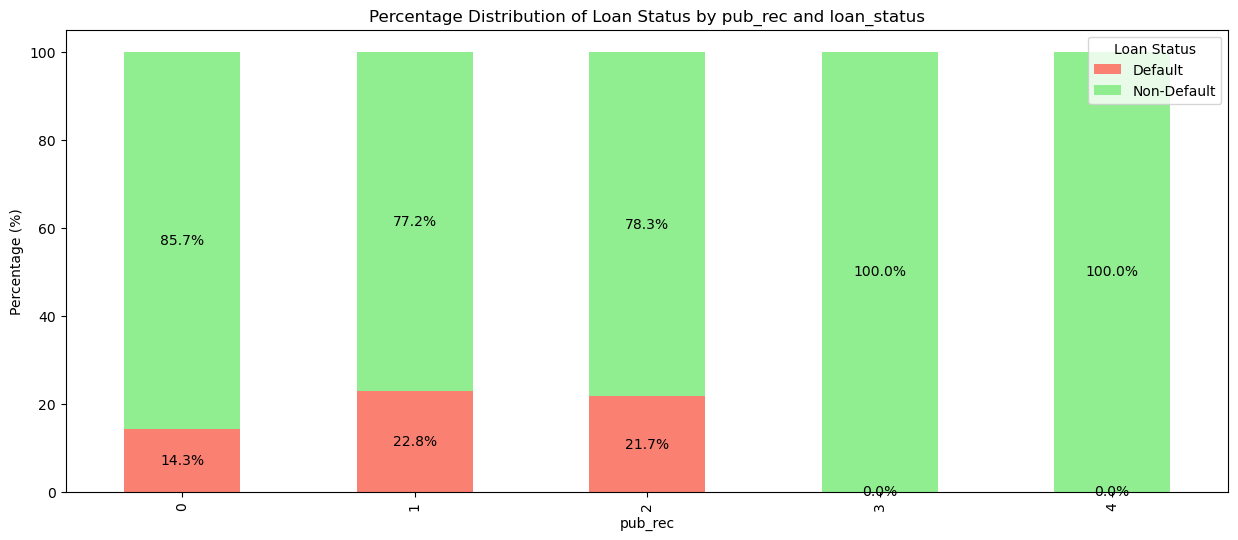

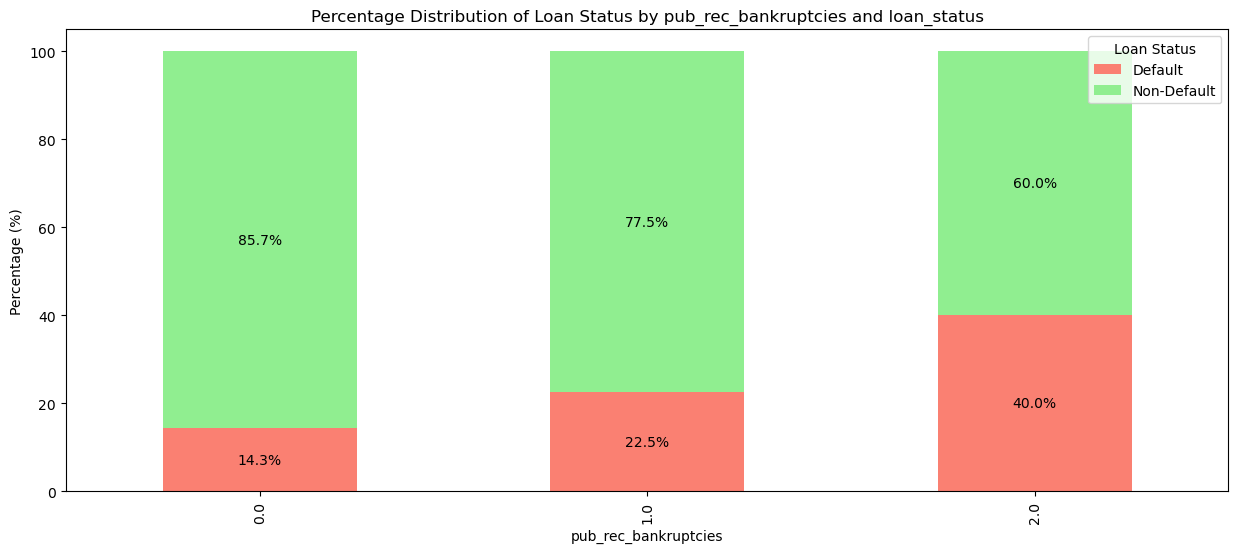

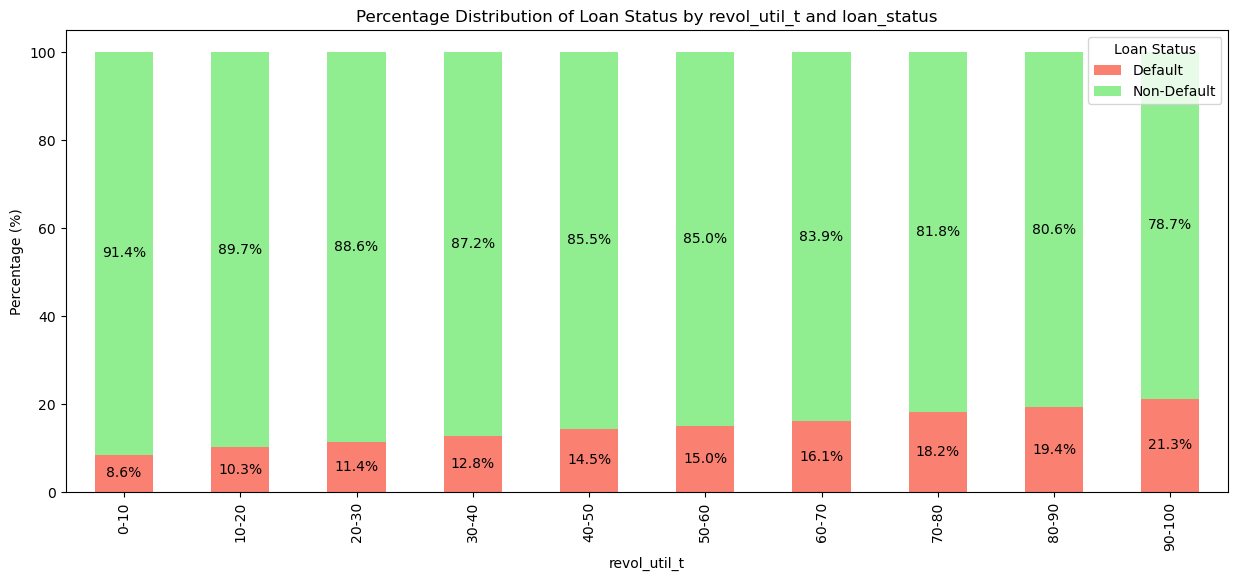

In [16]:
# Call the Reusable method to analyzie the percentage distribution for different categorical variables
df[['issue_month', 'issue_year']] = df['issue_d'].str.split('-', expand=True)
df['revol_util_t'] = pd.cut(df['revol_util'],bins=[0,10,20,30,40,50,60,70,80,90,100],labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100'])
plot_loan_status_percentage(df, 'term', 'loan_status')
plot_loan_status_percentage(df, 'grade', 'loan_status')
plot_loan_status_percentage(df, 'sub_grade', 'loan_status')
plot_loan_status_percentage(df, 'issue_month', 'loan_status')
plot_loan_status_percentage(df, 'issue_year', 'loan_status')
plot_loan_status_percentage(df, 'emp_length', 'loan_status')
plot_loan_status_percentage(df, 'home_ownership', 'loan_status')
plot_loan_status_percentage(df, 'verification_status', 'loan_status')
plot_loan_status_percentage(df, 'purpose', 'loan_status')
plot_loan_status_percentage(df, 'addr_state', 'loan_status')
plot_loan_status_percentage(df, 'pub_rec', 'loan_status')
plot_loan_status_percentage(df, 'pub_rec_bankruptcies', 'loan_status')
plot_loan_status_percentage(df, 'revol_util_t', 'loan_status')
